In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import cv2
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
# Load data
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

# Standardize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# lets print the first digit as 8x8 matrix
print("First digit as an 8x8 matrix:")
print(X[0].reshape((8, 8)))

First digit as an 8x8 matrix:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
# Split the dataset into training and test sets
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size=0.10, random_state=1)

# show the sizes of each data split
print("number of train samples: {}".format(len(X_train)))
print("number of test samples:: {}".format(len(X_test)))

number of train samples: 1617
number of test samples:: 180


In [4]:
# Different Perceptron parameters 
max_iters = [100, 1000, 10000, 100000]
tols = [1e-12, 1e-3, 50, 15000]
best_accuracy = 0
best_params = {}
# Loop through each determined parameteres
for max_iter in max_iters:
    for tol in tols:
        model = Perceptron(max_iter=max_iter, tol=tol, random_state=1)
        model.fit(X_train, y_train)
        # Test and evaluate the model
        fx_test = model.predict(X_test)
        accuracy = accuracy_score(y_test, fx_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_iter': max_iter, 'tol': tol}
        print(f"Results for max_iter={max_iter}, tol={tol}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Classification Report:\n{classification_report(y_test, fx_test)}")



Results for max_iter=100, tol=1e-12
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      0.89      0.87        19
           2       1.00      0.90      0.95        21
           3       0.91      0.95      0.93        22
           4       0.95      1.00      0.97        18
           5       0.88      0.88      0.88        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        21
           8       0.80      0.80      0.80        15
           9       0.90      0.82      0.86        11

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180

Results for max_iter=100, tol=0.001
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00     

In [5]:
# Print the best hyperparameters and accuracy
print("\nBest Hyperparameters:")
print(f"max_iter: {best_params['max_iter']}, tol: {best_params['tol']}")
print(f"Best Accuracy: {best_accuracy:.2f}")


Best Hyperparameters:
max_iter: 100, tol: 50
Best Accuracy: 0.94


In [6]:
# Evaluation with max_iter: 100, tol: 50 parameters
model = Perceptron(max_iter=best_params['max_iter'], 
                   tol=best_params['tol'], random_state=1)
model.fit(X_train, y_train)
fx_test = model.predict(X_test)

In [7]:
cr = classification_report(y_test, fx_test)
print("Classification Report:\n\n{}" .format(cr))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.86      1.00      0.93        19
           2       1.00      0.95      0.98        21
           3       0.95      0.95      0.95        22
           4       0.90      1.00      0.95        18
           5       0.89      1.00      0.94        17
           6       1.00      1.00      1.00        16
           7       0.95      0.95      0.95        21
           8       0.85      0.73      0.79        15
           9       1.00      0.64      0.78        11

    accuracy                           0.94       180
   macro avg       0.94      0.92      0.93       180
weighted avg       0.94      0.94      0.94       180



Confusion matrix


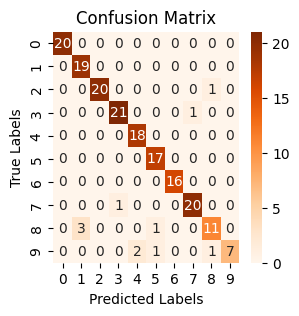

In [8]:
print ("Confusion matrix")
cm = confusion_matrix(y_test, fx_test)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=mnist.target_names, 
            yticklabels=mnist.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

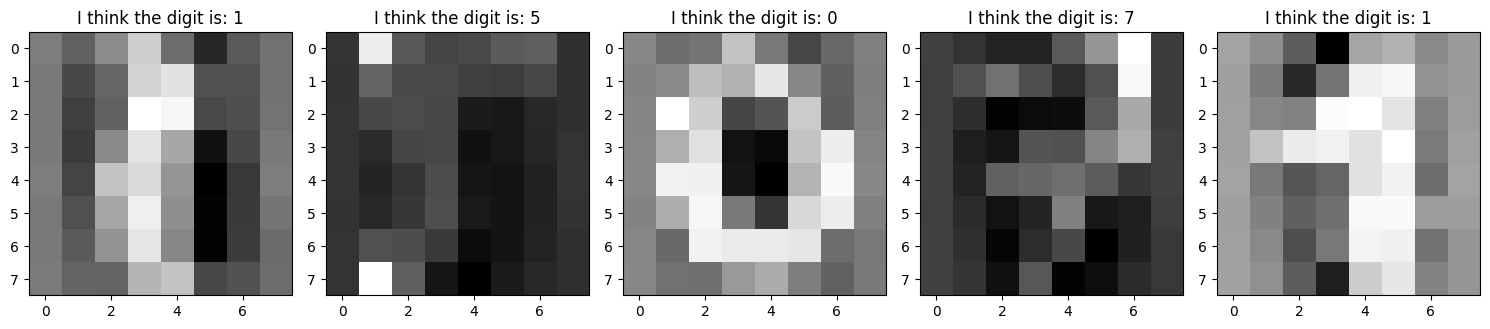

In [9]:
# Figure to hold subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns
axes = axes.flatten()
# visualize the first 5 digits and annotate them
for i in range(5):
         label = model.predict([X_test[i]])
         image = X_test[i].reshape((8,8))
         axes[i].imshow(image, cmap='gray')  # Images'll be shown in gray scale
         axes[i].set_title(f"I think the digit is: {label[0]}", fontsize=12)  
         cv2.waitKey(0)
# Show the plot
plt.tight_layout()
plt.show()